In [158]:
from ocr import OCR
from PIL import Image
import cv2
import os
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Density Images

1920 1080


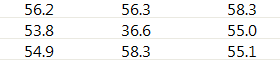

In [167]:
# Opens a image in RGB mode
# im = Image.open(r"og_pictures/P001, L eye, V2, 6.0 - Density DP.png")
im = Image.open(r"og_pictures/1.png")

# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
print(width,height)
# Setting the points for cropped image
table_top={
    'l' : 1530,
    't' : 154,
    'r' : 1825,
    'b' : 540
    }
table_bot={
    'l' : 1540,
    't' : 565,
    'r' : 1820,
    'b' : 625
    }

crop_dict=table_bot
cropped = im.crop((crop_dict['l'], crop_dict['t'], crop_dict['r'], crop_dict['b']))

display(cropped)

# Shows the image in image viewer

In [169]:
cropped.save('evaluate/cropped.png')

IMAGES: evaluate/ cropped.png
Looking for /home/carlo/.keras-ocr/craft_mlt_25k.h5


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Looking for /home/carlo/.keras-ocr/crnn_kurapan.h5
56.2
56.3
58.3
53.8
36.6
55.0
54.9
58.3
55.1


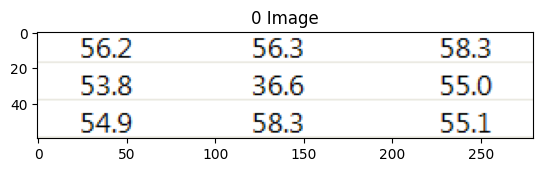

In [170]:
ocr=OCR(image_folder="evaluate/")

if __name__ == "__main__":
#     ocr.keras_ocr_works()  #THIS WORKS TERRIBLY
    results=ocr.easyocr_model_works()  
#     ocr.pytesseract_model_works()




In [171]:
#TOP
data_lin=np.array(results,dtype=object)[:,1]
data_2d=np.split(data_lin,data_lin.shape[0]/3)
df=pd.DataFrame(data_2d)
df

,0,1,2
0,56.2,56.3,58.3
1,53.8,36.6,55.0
2,54.9,58.3,55.1


In [172]:
#BOT
data_lin=np.array(results,dtype=object)[:,1]
data_2d=np.split(data_lin,data_lin.shape[0]/3)
df=pd.DataFrame(data_2d)
df

,0,1,2
0,56.2,56.3,58.3
1,53.8,36.6,55.0
2,54.9,58.3,55.1


In [34]:
a=np.array(results,dtype=object)[:,1][:-1]
a

array(['53.8', 'Whole Imaqe', '307', '54.1', 'Superior-Hemi', '308',
       '53.5', 'Inferior-Hemi', '306', '32.9', 'Fovea', '267', '55.6',
       'ParaFovea', '319', '55.6', 'Superior-Hemi', '321', '55.7',
       'Inferior-Hemi', '316', '54.3', 'Tempo', '309', '56.3', 'Superior',
       '323', '54.2', 'Nasal', '324', '57.9', 'Inferior', '317', 'N/A',
       'PeriFovea', 'N/A', 'N/A', 'Superior-Hemi', 'N/A', 'N/A',
       'Inferior-Hemi', 'N/A', 'N/A', 'Tempo', 'N/A', 'N/A', 'Superior',
       'N/A', 'N/A', 'Nasal', 'N/A', 'N/A', 'Inferior', 'N/A',
       'based Vessel Density (96)', '56.2', '56.3', '58.3', '53.8',
       '36.6', '55.0', '54.9', '58.3', '55.1'], dtype=object)

In [57]:
# np.any('Vessel' in )
a= np.delete(a,54)
a

array(['53.8', 'Whole Imaqe', '307', '54.1', 'Superior-Hemi', '308',
       '53.5', 'Inferior-Hemi', '306', '32.9', 'Fovea', '267', '55.6',
       'ParaFovea', '319', '55.6', 'Superior-Hemi', '321', '55.7',
       'Inferior-Hemi', '316', '54.3', 'Tempo', '309', '56.3', 'Superior',
       '323', '54.2', 'Nasal', '324', '57.9', 'Inferior', '317', 'N/A',
       'PeriFovea', 'N/A', 'N/A', 'Superior-Hemi', 'N/A', 'N/A',
       'Inferior-Hemi', 'N/A', 'N/A', 'Tempo', 'N/A', 'N/A', 'Superior',
       'N/A', 'N/A', 'Nasal', 'N/A', 'N/A', 'Inferior', 'N/A', '56.2',
       '56.3', '58.3', '53.8', '36.6', '55.0', '54.9', '58.3', '55.1'],
      dtype=object)

In [71]:
df=pd.DataFrame(np.array(np.split(a,a.shape[0]/3)))
df

,0,1,2
0,53.8,Whole Imaqe,307
1,54.1,Superior-Hemi,308
2,53.5,Inferior-Hemi,306
3,32.9,Fovea,267
4,55.6,ParaFovea,319
5,55.6,Superior-Hemi,321
6,55.7,Inferior-Hemi,316
7,54.3,Tempo,309
8,56.3,Superior,323
9,54.2,Nasal,324
